In [22]:
# %run coalition-calculations-exclude-2021.py # GL/PvdA is already combined, so input them as a single party

%run coalition-calculations-exclude-2023.py

In [23]:
if __name__ == "__main__":
    # kabinetten, zetels = load_data()
    kabinetten, zetels, ek_zetels = load_data()
    coalition_counter = build_coalition_frequency(kabinetten)

    # User Input  # <<—— Add the (alleged) seat distribution for the election you want to predict
    seat_distribution = {
        'VVD': 24,
        'PvdA': 0,
        'GL': 25,
        'D66': 9,
        'CDA': 5,
        'CU': 3,
        'PVV': 37,
        'BBB': 7,
        'SP': 5,
        'PvdD': 3,
        'NSC': 20,
        'DENK': 3,
        'FvD': 3,
        'SGP': 3,
        'Volt': 2,
        'JA21': 1
}

    Jaar = 2023  # <<—— Add the election year for Eerste Kamer seat distribution

    predictions = predict_coalitions(
        seat_distribution, 
        coalition_counter, 
        ek_zetels=ek_zetels, 
        Jaar=Jaar, 
        threshold=76, 
        top_k=7
    )


    for p in predictions:
        print(f"Coalition: {p['coalition']}")
        print(f"  Seats: {p['seats']}")
        print(f"  History Score: {p['historical_score']}")
        # print(f"  Topic Score: {p['topic_score']}")
        print(f"  Ideology Score: {p['ideology_score']}")
        print(f"  EK Score: {p['ek_score']}")  # Optional: show EK alignment
        print(f"  EK Seats: {p['ek_total_seats']}")
        print(f"  Party Penalty: {p['party_penalty']}")
        print(f"  Surplus Penalty: {p['surplus_penalty']}")
        print(f"  Final Score: {p['final_score']}%")
        print("")


Coalition: ('VVD', 'GL', 'CDA', 'PVV')
  Seats: 91
  History Score: 2.6
  Ideology Score: 1.56
  EK Score: 0.36
  EK Seats: 27
  Party Penalty: 0
  Surplus Penalty: 0.5
  Final Score: 91.6%

Coalition: ('VVD', 'PvdA', 'GL', 'PVV')
  Seats: 86
  History Score: 2.0
  Ideology Score: 1.69
  EK Score: 0.37
  EK Seats: 28
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 67.9%

Coalition: ('VVD', 'PVV', 'BBB', 'NSC')
  Seats: 88
  History Score: 1.3
  Ideology Score: 1.38
  EK Score: 0.48
  EK Seats: 36
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 49.0%

Coalition: ('VVD', 'PVV', 'NSC', 'SGP')
  Seats: 84
  History Score: 1.3
  Ideology Score: 1.38
  EK Score: 0.29
  EK Seats: 22
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 47.7%

Coalition: ('VVD', 'CDA', 'PVV', 'NSC')
  Seats: 86
  History Score: 1.3
  Ideology Score: 1.38
  EK Score: 0.27
  EK Seats: 20
  Party Penalty: 0
  Surplus Penalty: 0.0
  Final Score: 47.5%

Coalition: ('VVD', 'CDA', 'PVV', 'BBB', '

In [24]:
# parties_2023 = {
        # 'VVD': 24,
        # 'PvdA': 0,
        # 'GL': 25,
        # 'D66': 9,
        # 'CDA': 5,
        # 'CU': 3,
        # 'PVV': 37,
        # 'BBB': 7,
        # 'SP': 5,
        # 'PvdD': 3,
        # 'NSC': 20,
        # 'DENK': 3,
        # 'FvD': 3,
        # 'SGP': 3,
        # 'Volt': 2,
        # 'JA21': 1
# }

# parties_2021 = {
        # 'PVV':17,
        # 'VVD':34,
        # 'D66':24,
        # 'BBB':1,
        # 'CDA':15,
        # 'SP':9,
        # 'FvD':8,
        # 'PvdD':6,
        # 'SGP':3,
        # 'ChristenUnie':5,
        # 'DENK':3,
        # 'Volt':3,
        # 'JA21':3,
        # 'PvdA':9,
        # 'GroenLinks':8,
        # '50Plus':1,
        # 'BIJ1':1,
# }

/tmp/ipykernel_76338/3936670675.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_scores, y=coalitions, palette='viridis')


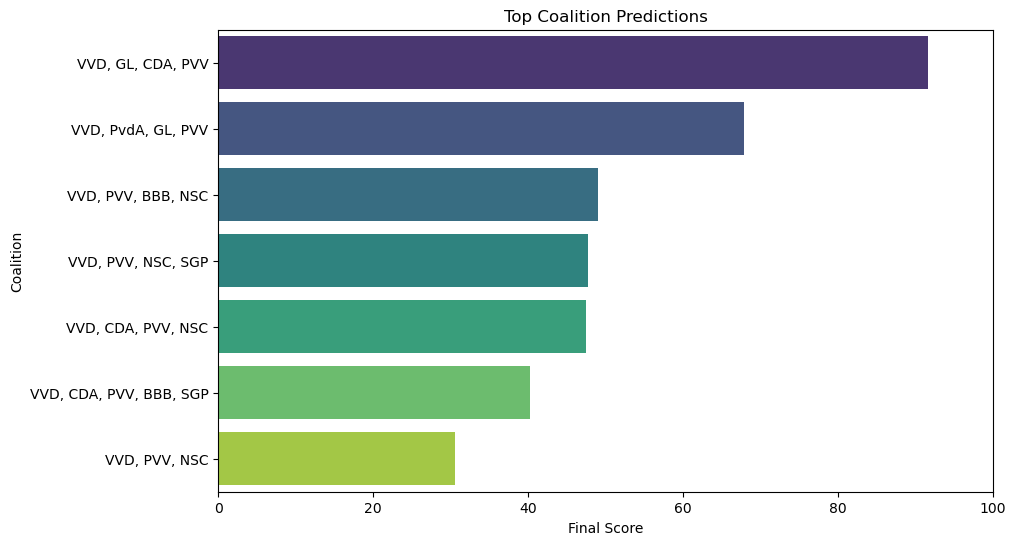

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_coalition_scores(predictions):
    coalitions = [', '.join(p['coalition']) for p in predictions]
    final_scores = [p['final_score'] for p in predictions]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=final_scores, y=coalitions, palette='viridis')
    plt.xlabel('Final Score')
    plt.ylabel('Coalition')
    plt.title('Top Coalition Predictions')
    plt.xlim(0, 100)
    plt.show()

plot_coalition_scores(predictions)